# Colored and Grayscale Image Processing

#### Student Information
- Name      : M. Fazri Nizar
- NIM       : 09021282328053
- Course    : Image Processing L1

### ________________________________
#### 0. Install All Needed Libraries

In [6]:
%pip install matplotlib
%pip install pillow
%pip install requests
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### ________________________________
#### 1. Import All Needed Libraries

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests

### ________________________________
#### 2. Define All Functions

In [8]:
# Function to load and display image
def load_and_display_image(image_path, title):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
    return image

# Function to convert RGB image to Grayscale
def rgb_to_grayscale(image):
    image_array = np.array(image)
    grayscale_array = np.dot(image_array[...,:3], [0.299, 0.587, 0.114])
    grayscale_image = Image.fromarray(grayscale_array.astype(np.uint8))
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
    grayscale_image.save("image_gray.jpg")
    return grayscale_image

# Function to convert image data to vector
def image_to_vector(image):
    return np.array(image).flatten()

# Function to analyze differences between two vectors
def analyze_difference(colored_vector, grayscale_vector):
    difference_vector = np.abs(colored_vector[:len(grayscale_vector)] - grayscale_vector)
    return difference_vector

# Function to plot the difference vector
def plot_difference(difference_vector):
    plt.figure(figsize=(10, 5))
    plt.plot(difference_vector)
    plt.title('Difference Between Colored and Grayscale Image Vectors')
    plt.xlabel('Pixel Index')
    plt.ylabel('Difference Value')
    plt.ylim(0, 255)
    plt.show()



### ________________________________
#### 3. Download, Load and Display Colored Images

Image downloaded and saved as 'image.jpg'


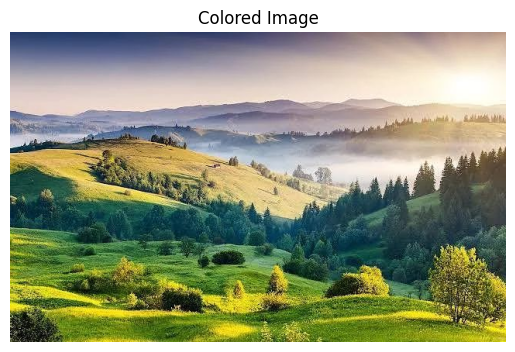

In [9]:

# URL of the image
url = 'https://upload.wikimedia.org/wikipedia/commons/d/d3/Pemandangan_Alam.jpg'

# Send a GET request to the URL
response = requests.get(url)

image_name = 'image.jpg'

with open(image_name, 'wb') as f:
    f.write(response.content)

print(f"Image downloaded and saved as '{image_name}'")

# Load and display the colored image
image_path = image_name
colored_image = load_and_display_image(image_path, 'Colored Image')

### ________________________________
#### 4. Convert Colored Image to Grayscale

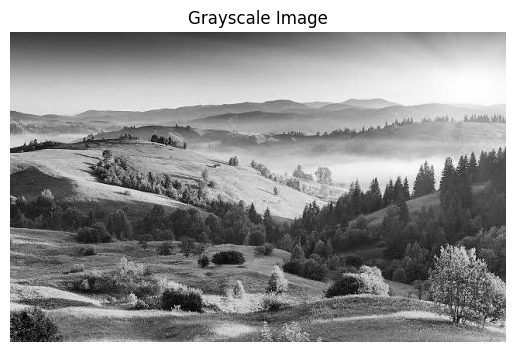

In [10]:
grayscale_image = rgb_to_grayscale(colored_image)

### ________________________________
#### 5. Extract Image Data to Vectors/Arrays

In [11]:
colored_image_vector = image_to_vector(colored_image)
grayscale_image_vector = image_to_vector(grayscale_image)

colored_image_vector_length = len(colored_image_vector)
grayscale_image_vector_length = len(grayscale_image_vector)

print(f"Colored Image Vector Length: {colored_image_vector_length}")
print(f"Grayscale Image Vector Length: {grayscale_image_vector_length}")

# Display the first 100 elements of the vectors
print(f"First 100 elements of Colored Image Vector: {colored_image_vector[:100]}")
print(f"First 100 elements of Grayscale Image Vector: {grayscale_image_vector[:100]}")

# Save the full vectors to text files
np.savetxt('colored_image_vector.txt', colored_image_vector, fmt='%d')
np.savetxt('grayscale_image_vector.txt', grayscale_image_vector, fmt='%d')

print("Full vectors saved to 'colored_image_vector.txt' and 'grayscale_image_vector.txt'")

Colored Image Vector Length: 768000
Grayscale Image Vector Length: 256000
First 100 elements of Colored Image Vector: [ 38  59 106  38  59 106  38  59 106  38  59 106  38  59 106  38  59 106
  38  59 106  38  59 106  40  61 108  40  61 108  40  61 108  40  61 108
  40  61 108  40  61 108  40  61 108  40  61 106  37  60 104  37  60 102
  37  60 102  37  60 102  37  60 102  37  60 102  37  60 102  37  60 102
  37  60 102  37  60 102  37  60 102  37  60 102  37  60 102  37  60 102
  37  60 102  37  60 102  37  60 102  37]
First 100 elements of Grayscale Image Vector: [58 58 58 58 58 58 58 58 60 60 60 60 60 60 60 59 58 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56
 55 55 55 55 55 55 55 56 55 55 55 55 55 55 55 55 58 58 58 58 58 58 58 58
 55 55 55 55]
Full vectors saved to 'colored_image_vector.txt' and 'grayscale_image_vector.txt'


### ________________________________
#### 6. Analyze Differences Between Colored and Grayscale Images

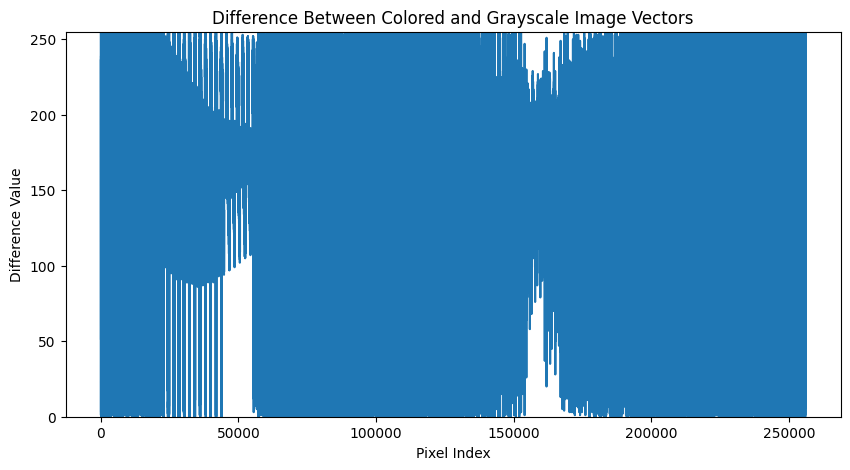

In [12]:
# Calculate the difference vector
difference_vector = analyze_difference(colored_image_vector, grayscale_image_vector)

# Plot the difference vector
plot_difference(difference_vector)

## Conclusion

Steps done:
1. The colored image is downloaded from a URL and saved locally.
2. The colored image is loaded and displayed using a custom function.
3. The colored image is converted to a grayscale image manually using numpy operations.
4. Both the colored and grayscale images are converted to vectors/arrays for analysis.
5. The difference between the colored and grayscale image vectors is calculated and plotted.
6. The plot shows the absolute difference in pixel values between the colored and grayscale images.

The grayscale image is a single-channel image where each pixel represents the intensity of light, whereas the colored image has three channels (Red, Green, Blue) representing color information. The difference vector highlights the changes in pixel values when converting from colored to grayscale.
